In [77]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [78]:
#choose circuit size
n = 4
grover_circuit = QuantumCircuit(n)

In [79]:
#initialize equal superposition
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

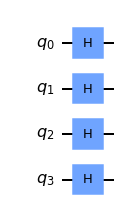

In [80]:
grover_circuit = initialize_s(grover_circuit, list(range(0,n)))
grover_circuit.draw('mpl')

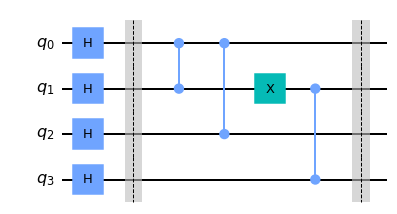

In [81]:
grover_circuit.barrier()

#implement an oracle
grover_circuit.cz(0,1) 
grover_circuit.cz(0,2)
grover_circuit.x(1)
grover_circuit.cz(1,3)

grover_circuit.barrier()
grover_circuit.draw('mpl')

In [82]:
#implement diffuser

# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(n):
    grover_circuit.h(qubit)
    
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(n):
    grover_circuit.x(qubit)
    
# Do multi-controlled-Z gate
grover_circuit.barrier()
grover_circuit.h(n-1)
grover_circuit.mct(list(range(n-1)), n-1)  # multi-controlled-toffoli
grover_circuit.h(n-1)
grover_circuit.barrier()

# Apply transformation |11..1> -> |00..0>
for qubit in range(n):
    grover_circuit.x(qubit)
    
# Apply transformation |00..0> -> |s>
for qubit in range(n):
    grover_circuit.h(qubit)
    
grover_circuit.barrier()

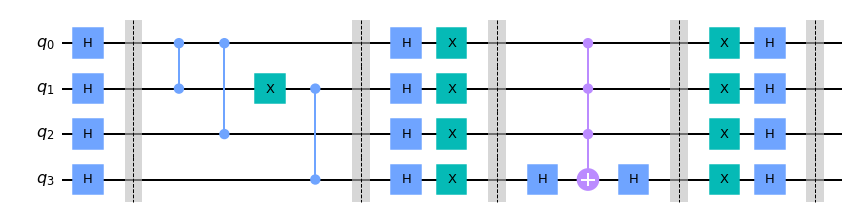

In [83]:
grover_circuit.draw('mpl')

In [84]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

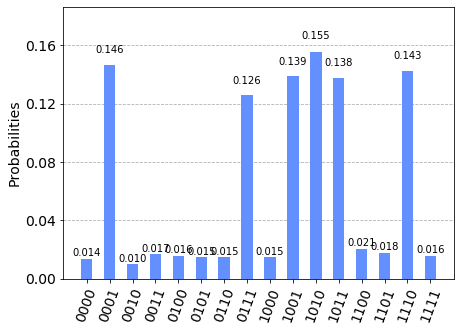

In [85]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)
